
### 1. Refresher: Basic SQL Operations

*   List item
*   List item

in Spark SQL
- **Tugas 1**: Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.



In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
print("Employees data : ")
spark.sql('SELECT * FROM employees').show()

print("Employee with Salary > 3000 : ")
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()

print("Rata-rata Salary : ")
spark.sql('SELECT AVG(Salary) FROM employees').show()


Employees data : 
+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

Employee with Salary > 3000 : 
+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

Rata-rata Salary : 
+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



### 2. Advanced Queries for Data Analysis
Gunakan queries lebih kompleks, melibatkan grouping, filtering, dan subqueries.
- **Tugas 2**: Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.

In [3]:
print("Total Gaji berdasarkan jenis kelamin dan usia : ")
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

Total Gaji berdasarkan jenis kelamin dan usia : 
+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



- **Tugas Tambahan 2**:
1. Cari rata-rata gaji per departemen.
2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.

In [ ]:
#Rata-rata gaji perdepartemen
print("Rata-rata gaji perdepartemen : ")
spark.sql('''
SELECT DeptId, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY DeptId
''').show()

#Menemukan karyawan dengan gaji diatas rata-rata untuk masing-masing gender
print("Karyawan dengan gaji diatas rata-rata untuk masing-masing gender : ")
spark.sql('''
WITH GenderAverage AS (SELECT Gender, AVG(Salary) AS AvgSalary
  FROM employees
  GROUP BY Gender
)
SELECT e.DeptID, e.Name, e.Gender, e.Salary
FROM employees e
JOIN GenderAverage ga ON e.Gender = ga.Gender
WHERE e.Salary >= ga.AvgSalary
''').show()

#Ranking karyawan berdasarkan gaji dalam departemen mereka
print("Ranking karyawan berdasarkan gaji dalam departemen : ")
spark.sql('''
SELECT Name, DeptId, Salary,
       RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS SalaryRank
FROM employees
''').show()

Rata-rata gaji perdepartemen : 
+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   2850.0|
|     2|   4100.0|
+------+---------+

Karyawan dengan gaji diatas rata-rata untuk masing-masing gender : 
+------+-----+------+------+
|DeptID| Name|Gender|Salary|
+------+-----+------+------+
|     1|James|     M|  3000|
|     2| Anna|     F|  4100|
+------+-----+------+------+

Ranking karyawan berdasarkan gaji dalam departemen : 
+-----+------+------+----------+
| Name|DeptId|Salary|SalaryRank|
+-----+------+------+----------+
|James|     1|  3000|         1|
|  Lee|     1|  2700|         2|
| Anna|     2|  4100|         1|
+-----+------+------+----------+



### 3. Penggunaan Window Functions dan Subqueries
Latihan penggunaan window functions untuk menemukan karyawan dengan gaji tertinggi dan urutannya berdasarkan kelompok usia.
- **Tugas 3**: Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.

In [ ]:
print("Top 3 karyawan dalam kelompok usia tertentu :  ")
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()


Top 3 karyawan dalam kelompok usia tertentu :  
+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



### 4. Advanced Spark SQL Queries
Menjelajahi queries yang lebih kompleks yang melibatkan multiple joins, subqueries, dan window functions.
- **Tugas 4**: Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
print("Employees data : ")
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

Employees data : 
+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



Latihan mandiri untuk memperkuat pemahaman tentang Spark SQL dalam analisis data terdistribusi.
- **Tugas 5**: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
- **Tugas 6**: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.


In [ ]:
# Tugas 5
print("Rata-rata gaji perdepartemen & ranking setiap karyawan dalam departemen : ")
spark.sql('''
SELECT e.Name, d.DeptName, e.Salary,
       AVG(e.Salary) OVER (PARTITION BY d.DeptName) AS AvgSalary,
       RANK() OVER (PARTITION BY d.DeptName ORDER BY e.Salary DESC) AS SalaryRank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

Rata-rata gaji perdepartemen & ranking setiap karyawan dalam departemen : 
+-----+---------+------+---------+----------+
| Name| DeptName|Salary|AvgSalary|SalaryRank|
+-----+---------+------+---------+----------+
|James|       HR|  3000|   2850.0|         1|
|  Lee|       HR|  2700|   2850.0|         2|
| Anna|Marketing|  4100|   4100.0|         1|
+-----+---------+------+---------+----------+



In [ ]:
# Tugas 6
print("Tren gaji berdasarkan usia di setiap departemen : ")
spark.sql('''
SELECT e.Name, d.DeptName, e.Age, AVG(e.Salary) OVER (PARTITION BY d.DeptName, e.Age) as AverageSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

Tren gaji berdasarkan usia di setiap departemen : 
+-----+---------+---+-------------+
| Name| DeptName|Age|AverageSalary|
+-----+---------+---+-------------+
|  Lee|       HR| 23|       2700.0|
|James|       HR| 34|       3000.0|
| Anna|Marketing| 28|       4100.0|
+-----+---------+---+-------------+



### 5. Advanced Data Analysis and Visualization
Penerapan teknik analisis data yang lebih canggih dan visualisasi menggunakan PySpark dan matplotlib.
- **Tugas 7**: Lakukan analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.


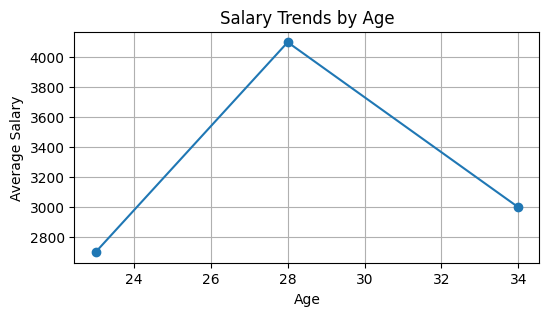

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(6, 3))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


### 6. Homework
- **Tugas 1**: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
- **Tugas 2**: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.
- **Tugas 3**: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel serta buat visualisasi yang menarik.


Total gaji dan jumlah karyawan perdepartemen : 
+---------+--------------+-----------+
| DeptName|TotalEmployees|TotalSalary|
+---------+--------------+-----------+
|       HR|             2|       5700|
|Marketing|             1|       4100|
+---------+--------------+-----------+

Visualisasi perbandingan antar departement : 


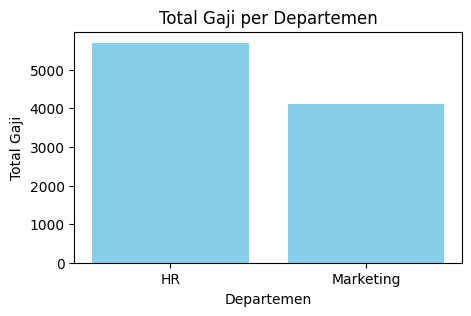

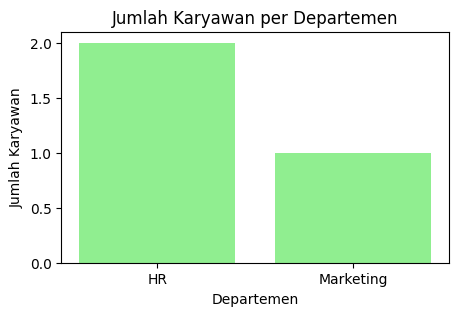

In [ ]:
# Tugas 1
print("Total gaji dan jumlah karyawan perdepartemen : ")
spark.sql('''
SELECT d.DeptName, COUNT(e.Name) AS TotalEmployees, SUM(e.Salary) AS TotalSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''').show()

print("Visualisasi perbandingan antar departement : ")
import matplotlib.pyplot as plt
import pandas as pd

# Ambil data hasil query dalam bentuk Pandas DataFrame
data = spark.sql('''
SELECT d.DeptName, COUNT(e.Name) AS TotalEmployees, SUM(e.Salary) AS TotalSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''').toPandas()

# Plot perbandingan Total Salary per Department
plt.figure(figsize=(5, 3))
plt.bar(data['DeptName'], data['TotalSalary'], color='skyblue')
plt.title('Total Gaji per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')
plt.show()

# Plot perbandingan Total Employees per Department
print("\n")
plt.figure(figsize=(5, 3))
plt.bar(data['DeptName'], data['TotalEmployees'], color='lightgreen')
plt.title('Jumlah Karyawan per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Jumlah Karyawan')
plt.show()

Rata-rata gaji karyawan :
+------------------+
|    RatarataSalary|
+------------------+
|3266.6666666666665|
+------------------+

Karyawan yang memiliki gaji di atas rata-rata dalam kelompok usia :
+----+---+------+
|Name|Age|Salary|
+----+---+------+
|Anna| 28|  4100|
+----+---+------+



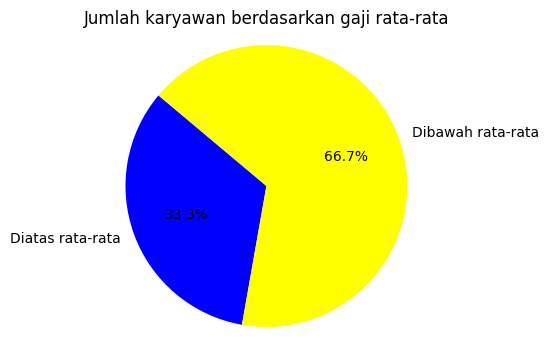

In [ ]:
# Tugas 2

print("Rata-rata gaji karyawan :")
spark.sql('''
SELECT AVG(Salary) as RatarataSalary FROM employees
''').show()

print("Karyawan yang memiliki gaji di atas rata-rata dalam kelompok usia :")
spark.sql('''
SELECT Name, Age, Salary
FROM employees
WHERE Salary > (SELECT AVG(Salary) FROM employees)
''').show()

# Karyawan diatas rata-rata
k_atas = spark.sql('''
SELECT COUNT(*) AS Count
FROM employees
WHERE Salary > (SELECT AVG(Salary) FROM employees)
''').collect()[0]["Count"]

# Karyawan dibawah rata-rata
k_bawah = spark.sql('''
SELECT COUNT(*) AS Count
FROM employees
WHERE Salary < (SELECT AVG(Salary) FROM employees)
''').collect()[0]['Count']

# Menyiapkan dalam pie chart
labels = ['Diatas rata-rata', 'Dibawah rata-rata']
sizes = [k_atas, k_bawah]
colors = ['blue', 'yellow']
explode = [0,0]

# Menampilkan data dalam pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Jumlah karyawan berdasarkan gaji rata-rata")
plt.axis("equal")
plt.show()



Data Employees : 
+----------+----------+--------+---------------+
|EmployeeID|   JobRole|JobLevel|IncomeEmployees|
+----------+----------+--------+---------------+
|         5|   Finance|   Entry|        12176.0|
|         7|Healthcare|     Mid|         8963.0|
|        13|Technology|  Senior|        10953.0|
|        33|     Media|   Entry|         6170.0|
|        36|Healthcare|   Entry|         9535.0|
|        40|   Finance|     Mid|         7388.0|
|        42|   Finance|  Senior|         9992.0|
|        55| Education|  Senior|         3173.0|
|        71|Healthcare|   Entry|         7044.0|
|        73|     Media|     Mid|         5430.0|
|        81|Technology|   Entry|         9572.0|
|        84| Education|  Senior|         3191.0|
|        87|Healthcare|   Entry|         8920.0|
|        89|Healthcare|     Mid|         7235.0|
|        96|Healthcare|     Mid|         8480.0|
|        99| Education|   Entry|         4573.0|
|       110|Technology|   Entry|         9001.0|
| 

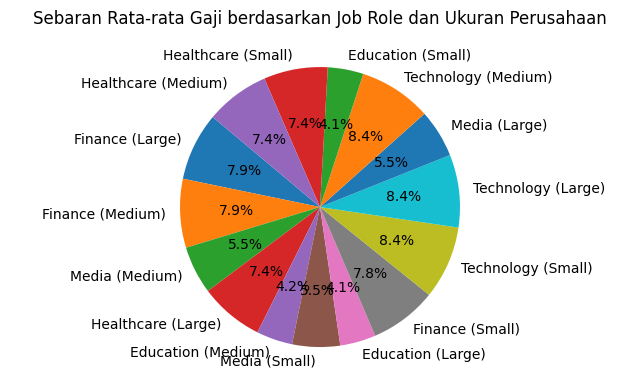

In [50]:
# tugas 6

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Analisis Income Employees").getOrCreate()

file_employees = "Employees.csv"
df_spark = spark.read.option("header", True).csv(file_employees, inferSchema=True)

df_spark.createOrReplaceTempView("Income")

# FUNGSI AVG
print("Data Employees : ")
spark.sql('''
SELECT EmployeeID, JobRole, JobLevel, AVG(Income) AS IncomeEmployees
FROM Income
GROUP BY JobRole, JobLevel, EmployeeID
ORDER BY EmployeeID
''').show()

#FUNGSI SUM
print("Total Income Employees : ")
spark.sql('''
SELECT JobRole, SUM(Income) AS TotalIncome
FROM Income
GROUP BY JobRole
''').show()

# FUNGSI COUNT
print("Total Company berdasarkan Company Size : ")
spark.sql('''
SELECT CompanySize, COUNT(*) AS TotalCompany
FROM Income
GROUP BY CompanySize
ORDER BY TotalCompany DESC
''').show()

# VISUALISASI DATA
df_company_size = spark.createDataFrame(company_size_data, company_size_columns)
df_company_size.createOrReplaceTempView("CompanySize")

print("Data Employees with Company Size : ")
spark.sql('''
SELECT i.JobRole, i.JobLevel, AVG(i.Income) AS IncomeEmployees, c.CompanySize
FROM Income i
JOIN CompanySize c ON i.JobRole = c.JobRole
GROUP BY i.JobRole, i.JobLevel, c.CompanySize
ORDER BY i.JobRole, i.JobLevel
''').show()

# Mengonversi hasil query ke Pandas DataFrame
avg_income_pd = avg_income_query.toPandas()

# Menambahkan label untuk pie chart
avg_income_pd['label'] = avg_income_pd['JobRole'] + " (" + avg_income_pd['CompanySize'] + ")"

# Membuat pie chart
plt.figure(figsize=(8, 4))
plt.pie(avg_income_pd['AverageIncome'], labels=avg_income_pd['label'], autopct='%1.1f%%', startangle=140)
plt.title('Sebaran Rata-rata Gaji berdasarkan Job Role dan Ukuran Perusahaan\n')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran
plt.show()
